In [1]:
# enable plotting in notebook
%matplotlib notebook

# Check ensemble of water system simulated with LAMMPS

Start by importing the `physical_validation` package. Please refer to http://physical-validation.readthedocs.io/ for the full documentation.

In [2]:
import physical_validation as pv

Create a LAMMPS parser

In [3]:
parser = pv.data.LammpsParser()

###########################################################################
# WARNING: The LAMMPS parser is an experimental feature under current     #
#          development. You can help us to improve it by reporting errors #
#          at https://github.com/shirtsgroup/physical_validation          #
#          Thank you!                                                     #
###########################################################################


In this example, we will only look at the simulations performed under NVT conditions using `fix nvt` (Nose-Hoover thermostat). We will analyze two simulations, one ran at 300K, and one ran at 308K.

In [4]:
ensemble_1 = pv.data.EnsembleData(
    ensemble='NVT',
    natoms=100*3,
    volume=20**3,
    temperature=300
)
ensemble_2 = pv.data.EnsembleData(
    ensemble='NVT',
    natoms=100*3,
    volume=20**3,
    temperature=308
)
dir_1 = 'nh_1'
dir_2 = 'nh_2'

We can now use the LAMMPS parser, the ensemble definitions created before, and the output of the simulations to creat simulation result representations for the two NVT simulations:

In [5]:
result_1 = parser.get_simulation_data(
    ensemble=ensemble_1,
    in_file=dir_1 + '/water.in',
    log_file=dir_1 + '/log.lammps',
    data_file=dir_1 + '/water.lmp',
    dump_file=dir_1 + '/dump.atom'
)
result_2 = parser.get_simulation_data(
    ensemble=ensemble_2,
    in_file=dir_2 + '/water.in',
    log_file=dir_2 + '/log.lammps',
    data_file=dir_2 + '/water.lmp',
    dump_file=dir_2 + '/dump.atom'
)


NOTE: Multiple runs found in log file. Assumed prior runs
      were equilibration runs and used only last run.
NOTE: Found `fix shake` or `fix rattle`. Reading of
      constraints is currently not implemented.
      Please set system.nconstraints manually.
NOTE: Multiple runs found in log file. Assumed prior runs
      were equilibration runs and used only last run.
NOTE: Found `fix shake` or `fix rattle`. Reading of
      constraints is currently not implemented.
      Please set system.nconstraints manually.


The LAMMPS parser is currently not able to set the number of constraints based on `fix shake` or `fix rattle` commands (see also the `NOTE` in the output of the previous commnd). We'll hence add the constraints here (3 constraints per molecule).

In [6]:
result_1.system.nconstraints=300
result_2.system.nconstraints=300

As with the other parsers, we can now test, for example, the kinetic energy using the created simulation result data structure, where
* the first input is the simulation results read in,
* `strict` determines whether we test the full distribution (`True`) or only determine the mean and the variance of the distribution (`False`),
* `verbosity` sets the level of detail of the output (with `verbosity=0` being quiet and `verbosity=3` being the most chatty),
* `filename` is being used to plot the resulting distribution for visual inspection,
* `screen=True` allows to see the plot directly on screen (or in this notebook).

==> Kinetic energy test of simulation nh_1
After equilibration, decorrelation and tail pruning, 100.00% (2001 frames) of original Kinetic energy remain.


<IPython.core.display.Javascript object>


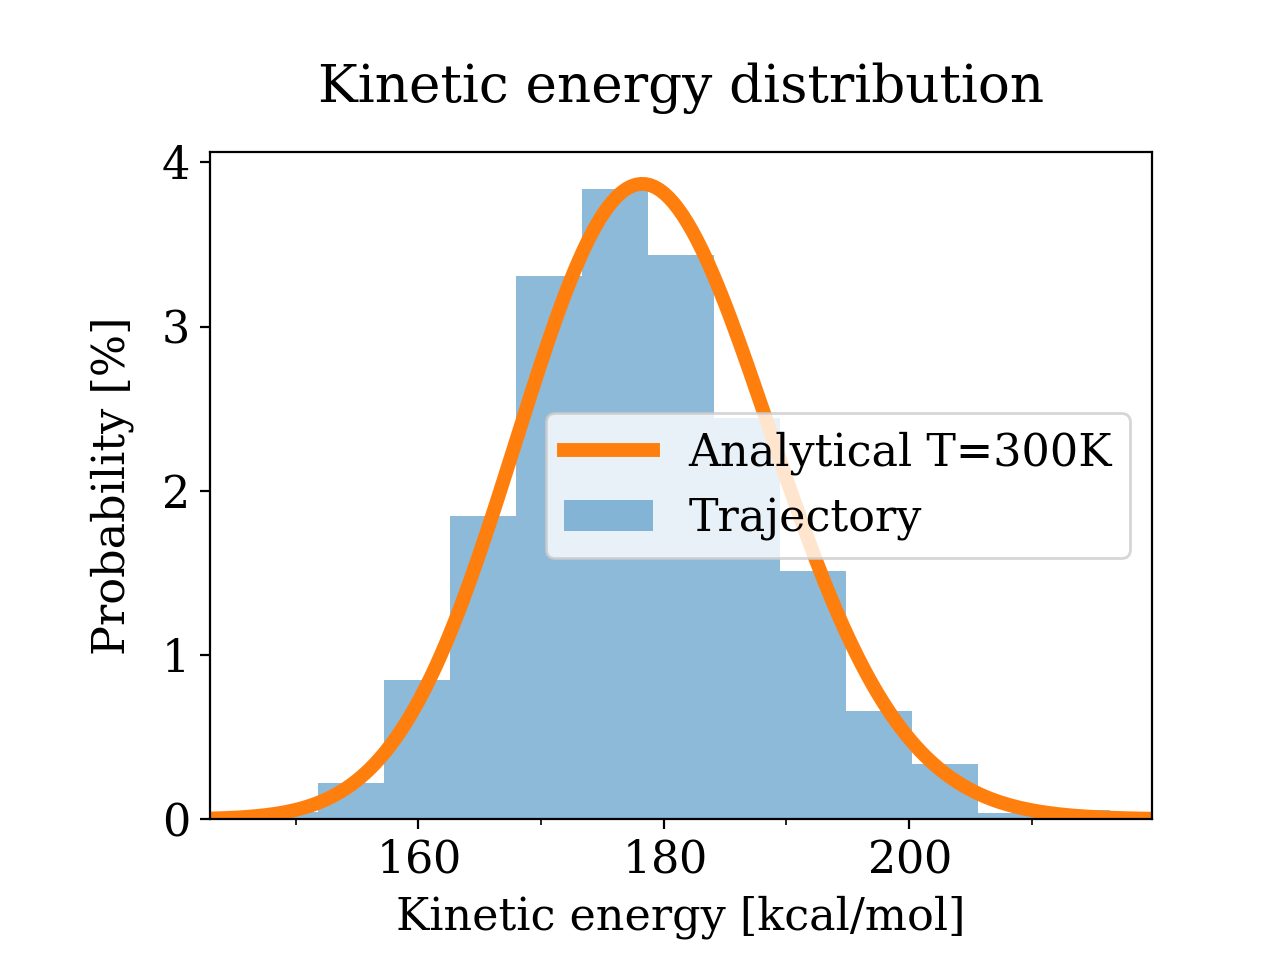

Kinetic energy distribution check (non-strict)
Analytical distribution (T=300.00 K):
 * mu: 178.85 kcal/mol
 * sigma: 10.33 kcal/mol
Trajectory:
 * mu: 178.05 +- 0.23 kcal/mol
   T(mu) = 298.67 +- 0.38 K
 * sigma: 10.35 +- 0.16 kcal/mol
   T(sigma) = 300.56 +- 4.67 K
==> Kinetic energy test of simulation nh_2
After equilibration, decorrelation and tail pruning, 100.00% (2001 frames) of original Kinetic energy remain.


<IPython.core.display.Javascript object>


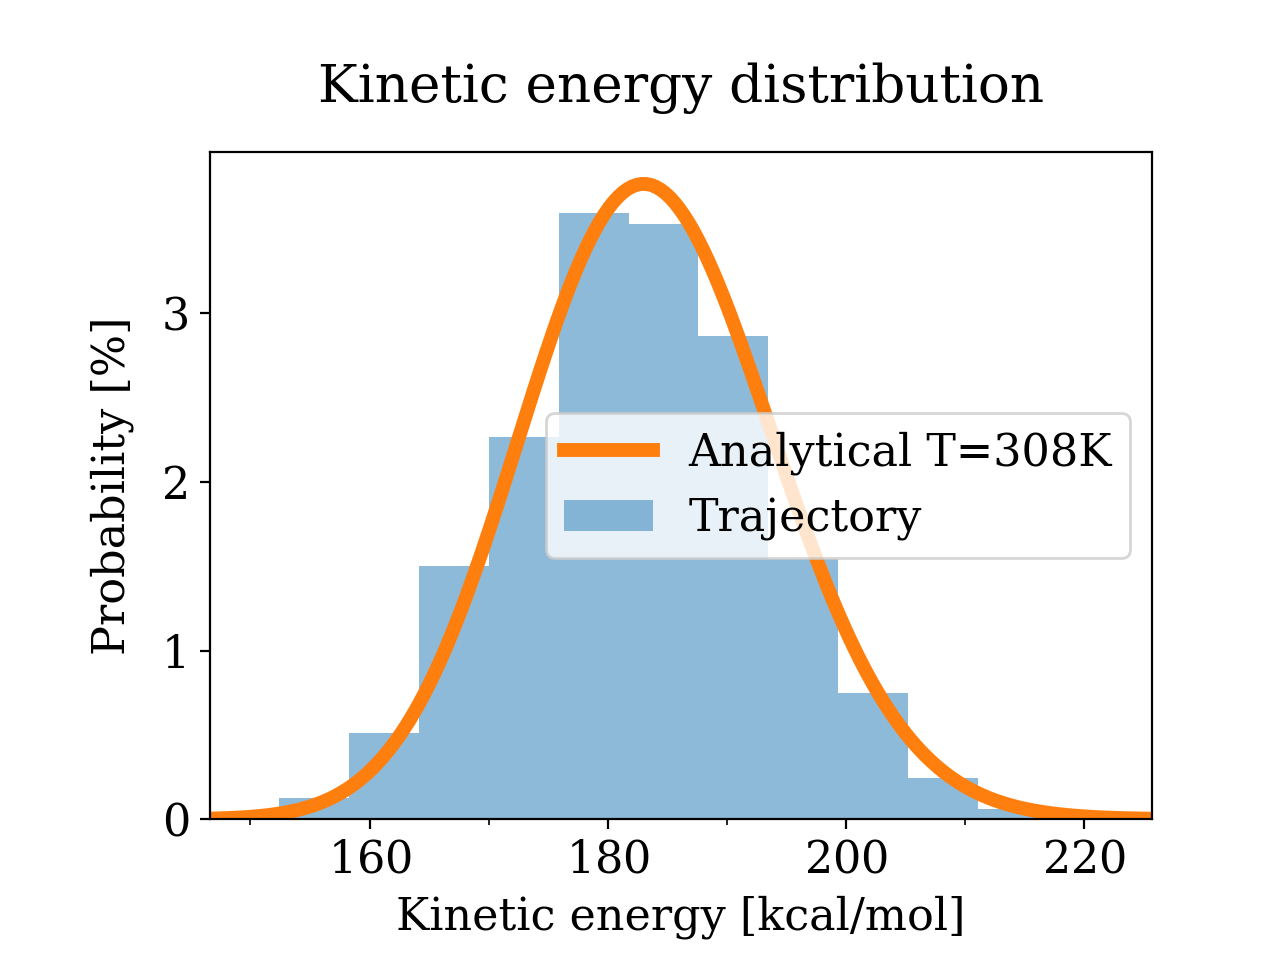

Kinetic energy distribution check (non-strict)
Analytical distribution (T=308.00 K):
 * mu: 183.62 kcal/mol
 * sigma: 10.60 kcal/mol
Trajectory:
 * mu: 182.68 +- 0.25 kcal/mol
   T(mu) = 306.42 +- 0.42 K
 * sigma: 10.80 +- 0.16 kcal/mol
   T(sigma) = 313.92 +- 4.74 K


(3.7811029153247597, 1.2489161533586097)

In [7]:
print('==> Kinetic energy test of simulation ' + dir_1)
pv.kinetic_energy.distribution(result_1, strict=False, verbosity=2,
                               filename='ke_lammps_vr_NVT_1', screen=True)
print('==> Kinetic energy test of simulation ' + dir_2)
pv.kinetic_energy.distribution(result_2, strict=False, verbosity=2,
                               filename='ke_lammps_vr_NVT_2', screen=True)

We can also test the distribution of the potential energy. While the first two inputs to the tests are the parsed simulation results, `verbosity` sets the level of detail of the output (with `verbosity=0` being quiet and `verbosity=3` being the most chatty), `filename` is being used to plot the resulting distribution to file for visual inspection, and `screen=True` allows to see the plot directly on screen (or in this notebook).

==> Potential energy test
Analytical slope of ln(P_2(U)/P_1(U)): 0.04356879
After equilibration, decorrelation and tail pruning, 31.03% (621 frames) of original Trajectory 1 remain.
After equilibration, decorrelation and tail pruning, 24.74% (495 frames) of original Trajectory 2 remain.
Overlap is 91.8% of trajectory 1 and 96.2% of trajectory 2.
A rule of thumb states that a good overlap is found when dT/T = (2*kB*T)/(sig),
where sig is the standard deviation of the energy distribution.
For the current trajectories, dT = 8.0, sig1 = 17.0 and sig2 = 16.4.
According to the rule of thumb, given T1, a good dT is dT = 21.0, and
                                given T2, a good dT is dT = 23.0.
Rule of thumb estimates that dT = 22.0 would be optimal (currently, dT = 8.0)


<IPython.core.display.Javascript object>


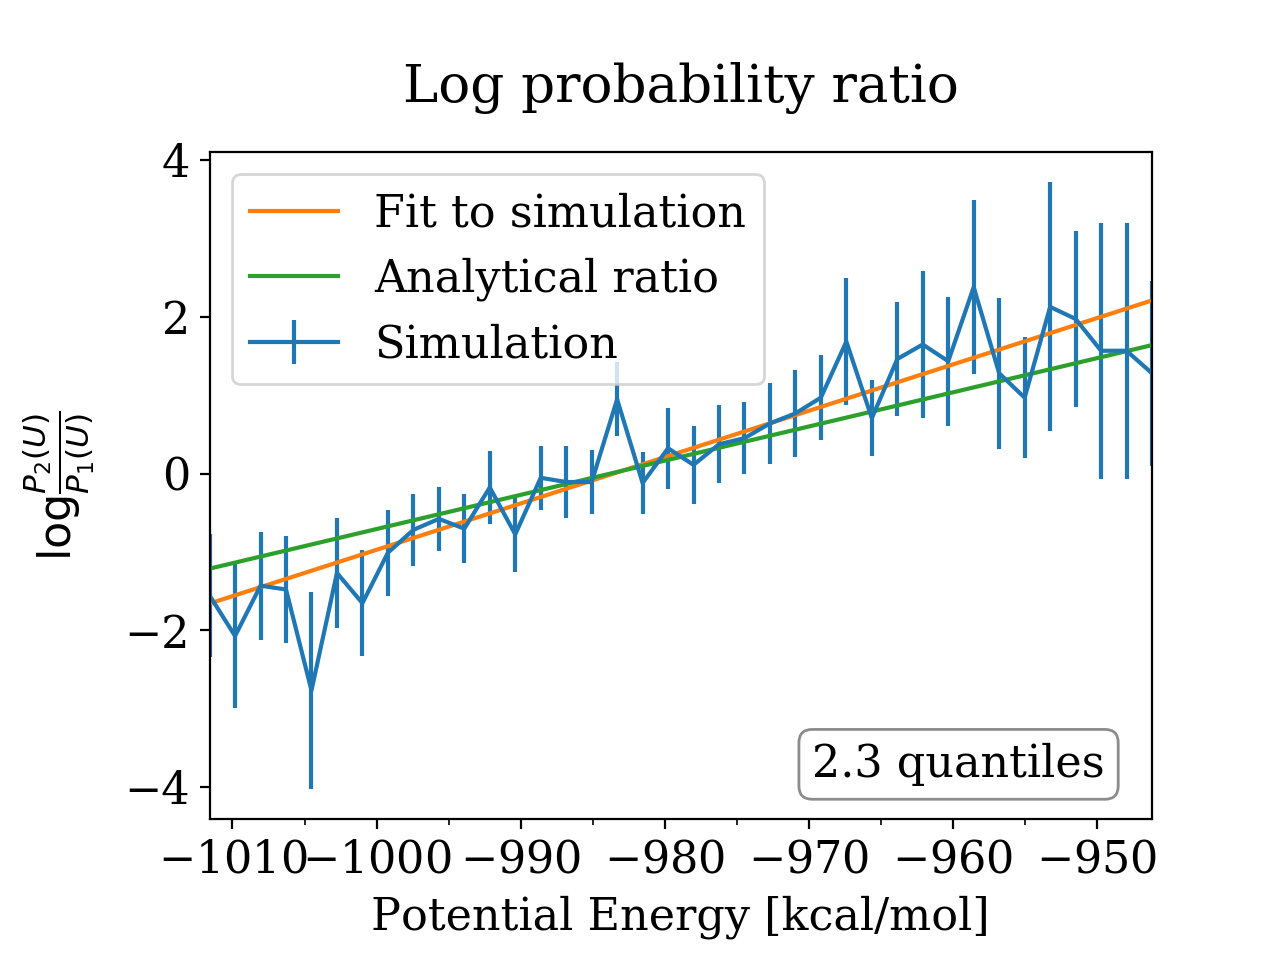

Linear Fit Analysis (analytical error)
Free energy
    58.10449 +/- 6.61084
Estimated slope                  |  True slope
    0.059076  +/- 0.006721       |  0.043569 
    (2.31 quantiles from true slope)
Estimated dT                     |  True dT
    10.8   +/- 1.2               |  8.0   
Maximum Likelihood Analysis (analytical error)
Free energy
    60.49561 +/- 6.41291
Estimated slope                  |  True slope
    0.061683  +/- 0.006521       |  0.043569 
    (2.78 quantiles from true slope)
Estimated dT                     |  True dT
    11.3   +/- 1.2               |  8.0   


[2.7780016528472857]

In [8]:
print('==> Potential energy test')
pv.ensemble.check(result_1, result_2,
                  verbosity=2, filename='pe_lammps_vr_NVT', screen=True)